# Natural Language Processing for Devnagari text using Python

In [1]:
!pip install nltk

In [2]:
import nltk

In [3]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [4]:
from nltk import FreqDist, bigrams
from nltk.probability import ConditionalFreqDist
from nltk.text import Text
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Load the font .ttf file for langauage support
import matplotlib.font_manager as fm
font_path = '/content/NotoSansDevanagari-VariableFont_wdth,wght.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Noto Sans Devanagari'

In [5]:
# Load the Bhojpuri text from the file
with open('/content/पीला_वॉलपेपर_भोजपुरी.txt', 'r', encoding='utf-8') as file:
    text = file.read()

In [6]:
print(text)

पीला वॉलपेपर के बा

शार्लोट पर्किन्स गिलमैन के लिखल ह


बहुत कम होला कि जॉन आ हमरा जइसन खाली आम लोग सुरक्षित होखे
गर्मी खातिर पैतृक हॉल बनावल गइल बा.

एगो औपनिवेशिक हवेली, एगो वंशानुगत संपत्ति, हम कहब कि एगो भूतिया घर,
आ रोमांटिक फेलिसिटी के ऊंचाई पर पहुँच जाईं-लेकिन ऊहो पूछल होखी
किस्मत के बहुत कुछ!

तबो हम गर्व से घोषणा करब कि एहमें कुछ क्वीयर बा.

ना त एतना सस्ता में काहे दिहल जाव? आ काहे एतना दिन से खड़ा बानी
बिना किराये के बा?

जॉन हमरा पर हँसेले, बेशक, लेकिन बियाह में अयीसन उम्मीद होखेला।

जॉन चरम सीमा में व्यावहारिक बाड़े। ओकरा विश्वास के कवनो धैर्य नइखे, आ...
अंधविश्वास के तीव्र भयावहता, आ ऊ कवनो बात पर खुल के मजाक उड़ावेला
जवन चीजन के महसूस ना कइल जाव आ ना देखल जाव आ आंकड़ा में ना राखल जाव.

यूहन्ना एगो चिकित्सक हवें, आ शायद—(हम ई बात कवनो जिंदा आत्मा से ना कहब,
बेशक, बाकिर ई मरल कागज ह आ हमरा खातिर बहुते राहत बा
मन)—शायद इहे एगो कारण बा कि हम जल्दी ठीक ना होखेनी।

देखत बाड़ऽ, ओकरा विश्वास नइखे कि हम बेमार बानी!

आ केहू का कर सकेला?

अगर कवनो उच्च पद के चिकित्सक, आ आपन खुद के 

In [7]:
type(text)

str

In [8]:
len(text)

31769

**Tokenization**

In [9]:
tokens = nltk.word_tokenize(text)
text_nltk = Text(tokens)
print("Text: \n", text_nltk)
print("Toknized Text: \n", tokens)

Text: 
 <Text: पीला वॉलपेपर के बा शार्लोट पर्किन्स गिलमैन के...>
Toknized Text: 
 ['पीला', 'वॉलपेपर', 'के', 'बा', 'शार्लोट', 'पर्किन्स', 'गिलमैन', 'के', 'लिखल', 'ह', 'बहुत', 'कम', 'होला', 'कि', 'जॉन', 'आ', 'हमरा', 'जइसन', 'खाली', 'आम', 'लोग', 'सुरक्षित', 'होखे', 'गर्मी', 'खातिर', 'पैतृक', 'हॉल', 'बनावल', 'गइल', 'बा', '.', 'एगो', 'औपनिवेशिक', 'हवेली', ',', 'एगो', 'वंशानुगत', 'संपत्ति', ',', 'हम', 'कहब', 'कि', 'एगो', 'भूतिया', 'घर', ',', 'आ', 'रोमांटिक', 'फेलिसिटी', 'के', 'ऊंचाई', 'पर', 'पहुँच', 'जाईं-लेकिन', 'ऊहो', 'पूछल', 'होखी', 'किस्मत', 'के', 'बहुत', 'कुछ', '!', 'तबो', 'हम', 'गर्व', 'से', 'घोषणा', 'करब', 'कि', 'एहमें', 'कुछ', 'क्वीयर', 'बा', '.', 'ना', 'त', 'एतना', 'सस्ता', 'में', 'काहे', 'दिहल', 'जाव', '?', 'आ', 'काहे', 'एतना', 'दिन', 'से', 'खड़ा', 'बानी', 'बिना', 'किराये', 'के', 'बा', '?', 'जॉन', 'हमरा', 'पर', 'हँसेले', ',', 'बेशक', ',', 'लेकिन', 'बियाह', 'में', 'अयीसन', 'उम्मीद', 'होखेला।', 'जॉन', 'चरम', 'सीमा', 'में', 'व्यावहारिक', 'बाड़े।', 'ओकरा', 'विश्वास', 'के', 'कवनो', 'धैर

**Searching Text**

In [10]:
print("Concordance for 'पीला':")
text_nltk.concordance('पीला')

Concordance for 'पीला':
Displaying 5 of 5 matches:
                                     पीला वॉलपेपर के बा शार्लोट पर्किन्स गिलमैन क
 उ ... हमरा सब कपड़ा आ जॉन के कपड़ा पर पीला रंग के स्मूच मिल गइल रहे आ ऊ चाहत रहल
ला। फंगस पर हमेशा नया अंकुर होला , आ पीला रंग के नया शेड सब होला एकरा ऊपर बा। 
तव्यनिष्ठा से कइल गइल बा . ई सबसे अजीब पीला बा , ऊ वॉलपेपर ! ई हमरा के सब के बार
 के रहे के पड़ेला , आ सब कुछ हरियर बा पीला रंग के जगह पर बा। बाकिर एहिजा हम फर्श


In [11]:
print("Similar words to 'भइल':")
text_nltk.similar('भइल')

Similar words to 'भइल':
आ त कर गइल हम पर करब ऊ ई आपन अइसन अब उ करत थक लगभग उनकर चल बस वजन


In [12]:
print("Common contexts for 'कइल':")
text_nltk.common_contexts(['कइल'])

Common contexts for 'कइल':
जवन_आ आ_गइल लमहर_अब पर_गइल हम_गइल आ_आ


**Dispersion Plot**

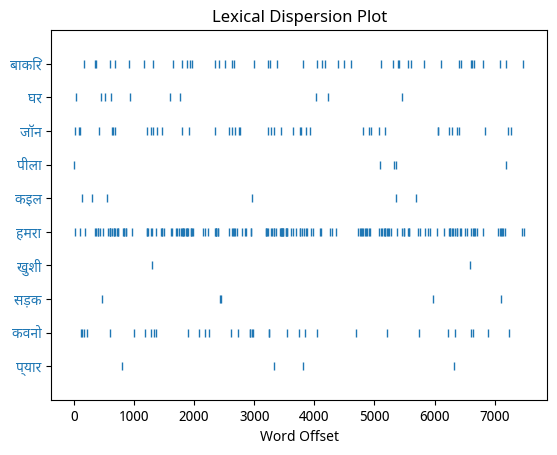

In [13]:
text_nltk.dispersion_plot(["बाकिर", "घर", "जॉन", "पीला", "कइल", "हमरा", "खुशी", "सड़क", "कवनो", "प्यार"])

In [14]:
print("\nGenerated text:")
print(text_nltk.generate())


Generated text:
पर , तोहरा आ जेन के बावजूद ! , प्लास्टर खुदे इहाँ-उहाँ खोदल गइल बा .
के पड़ी थक जाला। ओह बेर ऊ अपना के तबाह कर देला . ऊ दुआर का लगे कुछ देर
रुक गइलन . साथे-साथे ... नफरत के भाव बेहतर हो जाला। ई हमेशा एके आकार
के होला , खाली बहुत संख्या में होला। आ ई अउरी जोड़ देला अद्भुत बात से
भ्रम के स्थिति पैदा हो गईल। कमरा के कागज फिर से बनावल जाव , जबले जॉन
आवेला। हम ओकरा के तनी दोष नइखीं देत . कहले कि सिर्फ एगो खिड़की बा
अवुरी दु बिस्तर
पर , तोहरा आ जेन के बावजूद ! , प्लास्टर खुदे इहाँ-उहाँ खोदल गइल बा .
के पड़ी थक जाला। ओह बेर ऊ अपना के तबाह कर देला . ऊ दुआर का लगे कुछ देर
रुक गइलन . साथे-साथे ... नफरत के भाव बेहतर हो जाला। ई हमेशा एके आकार
के होला , खाली बहुत संख्या में होला। आ ई अउरी जोड़ देला अद्भुत बात से
भ्रम के स्थिति पैदा हो गईल। कमरा के कागज फिर से बनावल जाव , जबले जॉन
आवेला। हम ओकरा के तनी दोष नइखीं देत . कहले कि सिर्फ एगो खिड़की बा
अवुरी दु बिस्तर


Building ngram index...


**Counting Vocabulary**

In [15]:
print("Length of text:", len(text))

Length of text: 31769


In [16]:
unique_words = sorted(set(text))
print("Sorted unique words: ", unique_words)

Sorted unique words:  ['\n', ' ', '!', '"', '(', ')', ',', '-', '.', ';', '?', 'ँ', 'ं', 'अ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ए', 'ऑ', 'ओ', 'औ', 'क', 'ख', 'ग', 'घ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'ष', 'स', 'ह', '़', 'ऽ', 'ा', 'ि', 'ी', 'ु', 'ू', 'ृ', 'ॅ', 'े', 'ै', 'ॉ', 'ो', 'ौ', '्', '।', '\u200b', '—', '“', '”']


In [17]:
print("Length of unique words:", len(unique_words))

Length of unique words: 75


In [18]:
print("Length of tokens:", len(tokens))

Length of tokens: 7498


In [19]:
unique_tokenwords = sorted(set(tokens))
print("Sorted unique words:", unique_tokenwords)

Sorted unique words: ['!', "''", '(', ')', ',', '-जा', '.', '...', ';', '?', 'अंकुर', 'अंकुरित', 'अंगूठी', 'अंगूर', 'अंग्रेजी', 'अंडर', 'अंतहीन', 'अंतिम', 'अंदर', 'अंधविश्वास', 'अइनी', 'अइसन', 'अइसने', 'अइसे', 'अउरी', 'अकेले', 'अकेले।', 'अक्सर', 'अगर', 'अचरज', 'अचल', 'अचानक', 'अजीब', 'अतना', 'अतने', 'अत्याचारी', 'अद्भुत', 'अधिकतर', 'अधिका', 'अध्ययन', 'अनन्तता', 'अनसुना', 'अनिश्चित', 'अनुचित', 'अनुमान', 'अपना', 'अपमानजनक', 'अब', 'अबकी', 'अबहियों', 'अबहीं', 'अभद्रता', 'अभिव्यक्ति', 'अभी', 'अभी-अभी।', 'अयीसन', 'अरबेस्क', 'अलग', 'अलग-अलग', 'अलग-थलग', 'अलावे', 'अवसाद-', 'अवहेलना', 'अविश्वसनीय', 'अवुरी', 'अशुद्ध', 'असंख्य', 'असमंजस', 'असल', 'असली', 'असहमत', 'अस्थायी', 'आ', 'आँख', 'आँखि', 'आंकड़ा', 'आइल', 'आई', 'आईल', 'आकर्षक', 'आकार', 'आकृति', 'आखिर', 'आखिरकार', 'आखिरी', 'आज', 'आजमा', 'आजमावे', 'आजु', 'आज्ञा', 'आडंबर', 'आडंबरपूर्ण', 'आतंक', 'आतिशबाजी', 'आत्मसंयम', 'आत्महत्या—अपमानजनक', 'आत्मा', 'आदत', 'आदमी', 'आधा', 'आपके', 'आपन', 'आम', 'आराम', 'आरामदायक', 'आर्बर', 'आलसी', 'आवत', 'आवाज', 'आव

In [20]:
print("Length of unique token words:", len(unique_tokenwords))

Length of unique token words: 1510


In [21]:
word_count = text.count('सूरज')
print("Count of word 'सूरज':", word_count)

Count of word 'सूरज': 4


In [22]:
word_count = text.count('देवाल')
print("Count of word 'देवाल':", word_count)

Count of word 'देवाल': 7


**Lexical Diversity**

In [23]:
 # measure of the lexical richness of the text
len(set(text)) / len(text)

0.002360791967011867

In [24]:
 # measure of the lexical richness of the tokens
len(set(tokens)) / len(tokens)

0.20138703654307816

In [25]:
text.count('आ')

352

In [26]:
percentage_a = 100 * text.count('आ') / len(text)
print("Percentage of 'आ':", percentage_a)

Percentage of 'आ': 1.1079983631842363


In [27]:
def lexical_diversity(tokens):
  return len(set(tokens)) / len(tokens)

def percentage(count, total):
  return 100 * count / total

In [28]:
lexical_diversity(tokens)

0.20138703654307816

In [29]:
tokens.count('आ')

243

In [30]:
len(tokens)

7498

In [31]:
print("Percentage of 'आ': ", percentage(243, 7498))

Percentage of 'आ':  3.2408642304614563


**Texts as Lists of Words**

In [32]:
dummy1 = ['ऊ', 'हमरा', 'से', 'अतना', 'प्यार', 'करेला', '.']
dummy1

['ऊ', 'हमरा', 'से', 'अतना', 'प्यार', 'करेला', '.']

In [33]:
len(dummy1)

7

In [34]:
lexical_diversity(dummy1)

1.0

In [35]:
dummy2 = ['काहे', 'कि', 'उ', 'चाँदनी', 'के', 'रोशनी', 'रहे']
dummy2

['काहे', 'कि', 'उ', 'चाँदनी', 'के', 'रोशनी', 'रहे']

In [36]:
print(dummy1 + dummy2)

['ऊ', 'हमरा', 'से', 'अतना', 'प्यार', 'करेला', '.', 'काहे', 'कि', 'उ', 'चाँदनी', 'के', 'रोशनी', 'रहे']


In [37]:
dummy1.append("कि")
dummy1

['ऊ', 'हमरा', 'से', 'अतना', 'प्यार', 'करेला', '.', 'कि']

**Indexing Lists**

In [38]:
print("Token at index 23:", tokens[23])
print("Index of 'गर्मी':", tokens.index('गर्मी'))

Token at index 23: गर्मी
Index of 'गर्मी': 23


In [39]:
print("Token at index 2399:", tokens[2399])
print("Index of 'उनुका':", tokens.index('उनुका'))

Token at index 2399: उनुका
Index of 'उनुका': 2399


In [40]:
print("Slice from index 1225 to 1535:", tokens[1225:1535])

Slice from index 1225 to 1535: ['से', 'एगो', 'लिखे', 'से', 'नफरत', 'बा', 'शब्द।', 'हमनी', 'के', 'इहाँ', 'दु', 'सप्ताह', 'हो', 'गईल', 'बा', ',', 'अवुरी', 'हमरा', 'पहिले', 'लिखे', 'के', 'मन', 'ना', 'भईल', 'रहे', ',', 'ओह', 'पहिला', 'दिन', 'से', 'ही।', 'हम', 'अब', 'खिड़की', 'के', 'लगे', 'बइठल', 'बानी', ',', 'ऊपर', 'एह', 'अत्याचारी', 'नर्सरी', 'में', ',', 'आ', 'उहाँ', 'के', 'कमी', 'के', 'छोड़', 'के', 'हमरा', 'लेखन', 'में', 'जेतना', 'बाधा', 'आवे', 'वाला', 'कवनो', 'बात', 'नइखे', 'जोर।', 'जॉन', 'दिन', 'भर', 'दूर', 'रहेले', ',', 'अवुरी', 'कुछ', 'रात', 'तक', 'जब', 'उनुकर', 'मामला', 'गंभीर', 'होखेला।', 'हमरा', 'खुशी', 'बा', 'कि', 'हमार', 'केस', 'गंभीर', 'नइखे', '!', 'बाकिर', 'ई', 'घबराहट', 'के', 'परेशानी', 'भयानक', 'निराशाजनक', 'होला', '.', 'जॉन', 'के', 'पता', 'नइखे', 'कि', 'हम', 'सचमुच', 'केतना', 'कष्ट', 'उठावत', 'बानी।', 'ऊ', 'जानत', 'बा', 'कि', 'कवनो', 'नइखे', 'दुख', 'उठावे', 'के', 'कारण', 'बा', ',', 'आ', 'ऊ', 'ओकरा', 'के', 'संतुष्ट', 'कर', 'देला', '.', 'बेशक', 'ई', 'खाली', 'घबराहट', 'ह', '.'

In [41]:
print("Slice from index 0 to 10:", text[0:10])

Slice from index 0 to 10: पीला वॉलपे


**Strings**

In [42]:
noun = 'हमनी'
noun[0]

'ह'

In [43]:
noun[:3]

'हमन'

In [44]:
noun * 3

'हमनीहमनीहमनी'

In [45]:
noun + '!'

'हमनी!'

In [46]:
' '.join(['इहाँ', 'हमनी'])

'इहाँ हमनी'

In [47]:
'इहाँ हमनी'.split()

['इहाँ', 'हमनी']

**Frequency Distribution**

In [48]:
fdist1 = FreqDist(text)
print(fdist1)

<FreqDist with 75 samples and 31769 outcomes>


In [49]:
fdist2 = FreqDist(tokens)
print(fdist2)

<FreqDist with 1510 samples and 7498 outcomes>


In [50]:
fdist2.most_common(50)

[('के', 471),
 (',', 378),
 ('आ', 243),
 ('हम', 179),
 ('बा', 175),
 ('हमरा', 170),
 ('से', 159),
 ('कि', 158),
 ('में', 128),
 ('ना', 102),
 ('.', 92),
 ('!', 89),
 ('ऊ', 87),
 ('ई', 62),
 ('पर', 60),
 ('त', 59),
 ('बानी', 57),
 ('एगो', 56),
 ('...', 50),
 ('बाकिर', 46),
 ('जॉन', 43),
 ('ओकरा', 43),
 ('खातिर', 40),
 ('रहे', 40),
 ('हो', 39),
 ('कवनो', 35),
 ('करे', 35),
 ('बा।', 34),
 ('गइल', 32),
 ('एकरा', 32),
 ('बात', 31),
 ('कर', 31),
 ('ओह', 31),
 ('जाला', 30),
 ('जवन', 28),
 ('नीचे', 28),
 ('होखे', 27),
 ('कुछ', 27),
 ('एतना', 27),
 ('नइखे', 27),
 ('लोग', 25),
 ('“', 24),
 ('काहे', 23),
 ('”', 23),
 ('बढ़िया', 23),
 ('कमरा', 23),
 ('जब', 23),
 ('बारे', 22),
 ('अतना', 22),
 ('पैटर्न', 22)]

In [51]:
fdist2['बानी']

57

In [52]:
fdist2['tokens'] += 1
print(fdist2)

<FreqDist with 1511 samples and 7499 outcomes>


In [53]:
fdist2.freq('बानी')

0.007601013468462462

In [54]:
fdist2.freq('हमरा')

0.022669689291905586

In [55]:
fdist2.N()

7499

In [56]:
fdist2.max()

'के'

In [57]:
fdist2.tabulate(10)

  के    ,    आ   हम   बा हमरा   से   कि  में   ना 
 471  378  243  179  175  170  159  158  128  102 


<Axes: xlabel='Samples', ylabel='Counts'>

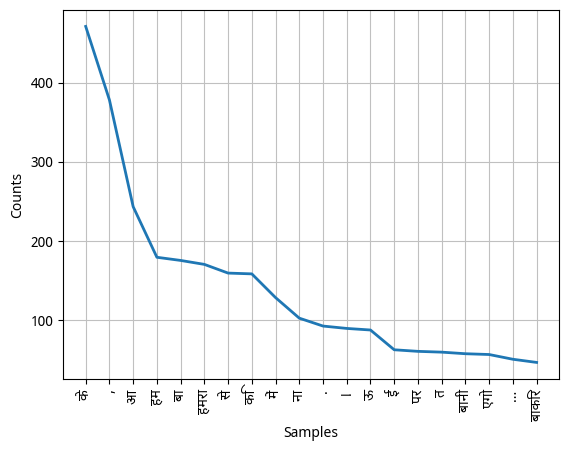

In [58]:
fdist2.plot(20)

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

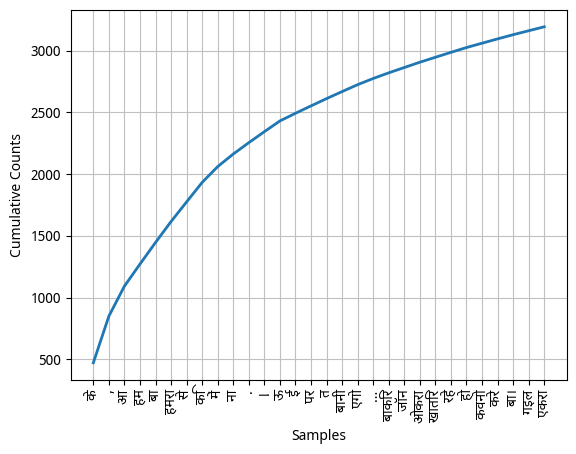

In [59]:
fdist2.plot(30, cumulative=True)

In [60]:
fdist2.hapaxes()

['शार्लोट',
 'पर्किन्स',
 'गिलमैन',
 'लिखल',
 'गर्मी',
 'पैतृक',
 'औपनिवेशिक',
 'हवेली',
 'वंशानुगत',
 'संपत्ति',
 'भूतिया',
 'रोमांटिक',
 'फेलिसिटी',
 'ऊंचाई',
 'जाईं-लेकिन',
 'ऊहो',
 'पूछल',
 'किस्मत',
 'गर्व',
 'सस्ता',
 'किराये',
 'हँसेले',
 'बियाह',
 'चरम',
 'व्यावहारिक',
 'धैर्य',
 'अंधविश्वास',
 'तीव्र',
 'भयावहता',
 'खुल',
 'उड़ावेला',
 'आंकड़ा',
 'राखल',
 'हवें',
 'शायद—',
 '(',
 'जिंदा',
 'आत्मा',
 'मरल',
 ')',
 '—शायद',
 'होखेनी।',
 'खुद',
 'पति',
 'दोस्तन',
 'दिआवे',
 'रिश्तेदारन',
 'वास्तव',
 'अस्थायी',
 'तंत्रिका',
 'अवसाद-',
 'हल्का',
 'हिस्टीरिकल',
 'प्रवृत्ति-एक',
 'फॉस्फेट',
 'फॉस्फाइट',
 'बानी-जवन',
 'मना',
 'ओ',
 'असहमत',
 'मानना',
 'उत्साह',
 'बदलाव',
 'करीत।',
 'लिखनी',
 'सौदा—एह',
 'भेंट',
 'समाज',
 'प्रोत्साहन-लेकिन',
 'कबूल',
 'करतानी',
 'एहसास',
 'होखेला',
 'खराब।',
 'करब।',
 'गाँव',
 'मील',
 'दूर।',
 'अंग्रेजी',
 'पढ़त',
 'हेज',
 'माली',
 'छोट-छोट',
 'स्वादिष्ट',
 'रहनी-बड़का',
 'बक्सा',
 'सीट',
 'ग्रीनहाउस',
 'टूट',
 'कानूनी',
 'वारिस',
 'सह-वारिस',
 'वइसे',

In [61]:
hapaxes = fdist2.hapaxes()
len(hapaxes)

866

**Conditional Operators**




In [62]:
long_words = [w for w in set(tokens) if len(w) > 15]
print("Long words (more than 15 characters):", sorted(long_words))

Long words (more than 15 characters): ['आत्महत्या—अपमानजनक', 'गोल-गोल-गोल-गोल-गोल-गोल-चक्कर', 'प्रोत्साहन-लेकिन']


In [63]:
short_words = [w for w in set(tokens) if len(w) <= 4]
print("Short words (less than 4 characters):", sorted(short_words))

Short words (less than 4 characters): ['!', "''", '(', ')', ',', '-जा', '.', '...', ';', '?', 'अंडर', 'अंदर', 'अइनी', 'अइसन', 'अइसे', 'अउरी', 'अगर', 'अचरज', 'अचल', 'अजीब', 'अतना', 'अतने', 'अपना', 'अब', 'अबकी', 'अभी', 'अलग', 'असल', 'असली', 'आ', 'आँख', 'आँखि', 'आइल', 'आई', 'आईल', 'आकार', 'आखिर', 'आज', 'आजमा', 'आजु', 'आतंक', 'आदत', 'आदमी', 'आधा', 'आपके', 'आपन', 'आम', 'आराम', 'आलसी', 'आवत', 'आवाज', 'आवे', 'इ', 'इयाद', 'इहाँ', 'इहे', 'ई', 'उ', 'उचित', 'उच्च', 'उठ', 'उठा', 'उतर', 'उतरल', 'उदास', 'उधम', 'उनकर', 'उनका', 'उभरत', 'उमेद', 'उहाँ', 'उहे', 'उहो', 'ऊ', 'ऊँच', 'ऊपर', 'ऊपर।', 'ऊहो', 'ए', 'एक', 'एकर', 'एकरा', 'एके', 'एगो', 'एतना', 'एले', 'एल्म', 'एह', 'एहसे', 'एही', 'ऑयल', 'ओ', 'ओकर', 'ओकरा', 'ओतना', 'ओतने', 'ओर', 'ओर।', 'ओवर', 'ओसही', 'ओह', 'क', 'कंधा', 'कइनी', 'कइल', 'कइलन', 'कइला', 'कइले', 'कइसन', 'कइसे', 'कई', 'कईनी', 'कईल', 'कईले', 'कठिन', 'कठोर', 'कतना', 'कदम', 'कबूल', 'कबो', 'कम', 'कमरा', 'कमी', 'कर', 'करत', 'करत।', 'करब', 'करब।', 'करवा', 'करसु', 'करा', 'करित', 'करीं', 'करीब', 'क

In [64]:
len(short_words)

752

In [65]:
equal_length_words = [w for w in set(tokens) if len(w) == 4]
print("Equal length words (equal to 4 characters):", sorted(equal_length_words))

Equal length words (equal to 4 characters): ['अंडर', 'अंदर', 'अइनी', 'अइसन', 'अइसे', 'अउरी', 'अचरज', 'अजीब', 'अतना', 'अतने', 'अपना', 'अबकी', 'असली', 'आँखि', 'आकार', 'आखिर', 'आजमा', 'आतंक', 'आदमी', 'आपके', 'आराम', 'आलसी', 'आवाज', 'इयाद', 'इहाँ', 'उचित', 'उच्च', 'उतरल', 'उदास', 'उनकर', 'उनका', 'उभरत', 'उमेद', 'उहाँ', 'ऊपर।', 'एकरा', 'एतना', 'एल्म', 'एहसे', 'ओकरा', 'ओतना', 'ओतने', 'ओसही', 'कंधा', 'कइनी', 'कइलन', 'कइला', 'कइले', 'कइसन', 'कइसे', 'कईनी', 'कईले', 'कठिन', 'कठोर', 'कतना', 'कबूल', 'कमरा', 'करत।', 'करब।', 'करवा', 'करसु', 'करित', 'करीं', 'करीब', 'कवना', 'कवनो', 'कष्ट', 'कहनी', 'कहलस', 'कहली', 'कहले', 'कहे।', 'कागज', 'काफी', 'काबू', 'काम।', 'कारण', 'काहे', 'केला', 'केहू', 'कोना', 'कोमल', 'कोरा', 'क्रम', 'खड़ा', 'खतरा', 'खराब', 'खाता', 'खाती', 'खाना', 'खाली', 'खींच', 'खुदे', 'खुलल', 'खुला', 'खुशी', 'खेती', 'खोजे', 'खोदल', 'खोलल', 'खोलऽ', 'गंदा', 'गइनी', 'गइलन', 'गइला', 'गइले', 'गइल।', 'गईनी', 'गईल।', 'गयिल', 'गर्व', 'गाँव', 'गिरा', 'गुजर', 'गोली', 'घंटन', 'घंटा', 'घड़ी', 'घुमा', 'घु

In [66]:
len(equal_length_words)

422

 **Collocations and Bigrams**

In [67]:
print("Collocations:")
text_nltk.collocations()

Collocations:
बारे में; कहत बाड़न; गला रेत; कवनो आश्चर्य; देखत बानी; ठीक ओसही; बाहर
निकाले; कील ठोकल; बल्ब नियर; रात में; पीला रंग; करत बानी; कमरा में;
बाहरी पैटर्न; देखत बाड़ऽ; पसंद नइखे।; हमरा लागता; हमार मतलब; पुरान
जमाना; पूरा भरोसा


In [68]:
bigram_list = list(bigrams(["देवाल", "घर", "जॉन", "पीला", "कइल", "बच्चा", "खुशी", "सड़क", "भइल", "प्यार"]))
print("Bigrams example: \n", bigram_list)

Bigrams example: 
 [('देवाल', 'घर'), ('घर', 'जॉन'), ('जॉन', 'पीला'), ('पीला', 'कइल'), ('कइल', 'बच्चा'), ('बच्चा', 'खुशी'), ('खुशी', 'सड़क'), ('सड़क', 'भइल'), ('भइल', 'प्यार')]


**Word Comaprison Operator**

In [69]:
sorted(w for w in set(tokens) if w.startswith('कइल'))

['कइल', 'कइलन', 'कइलसि', 'कइला', 'कइली-ई', 'कइले']

In [70]:
print(sorted(w for w in set(tokens) if w.endswith('ला')))

['आवेला', 'उजाला', 'उड़ावेला', 'कइला', 'करेला', 'केला', 'खुला', 'गइला', 'गला', 'घुमावेला', 'चमकेला', 'चलेला', 'जाला', 'ताला', 'दिला', 'देखला', 'देला', 'पड़ेला', 'पलटला', 'पहिला', 'पिछला', 'पीला', 'बदलला', 'बनावेला', 'बेला', 'भूला', 'मामला', 'मामिला', 'मिलला', 'मिलेला', 'रहेला', 'राखेला', 'रेंगला', 'लागेला', 'लेला', 'वाला', 'व्यायामशाला', 'सकेला', 'हँसेला', 'हिला', 'होखेला', 'होला']


In [71]:
print(sorted(w for w in set(tokens) if w.isalpha()))

['अइसन', 'अगर', 'अचरज', 'अचल', 'अब', 'अलग', 'असल', 'असहमत', 'आ', 'आइल', 'आई', 'आईल', 'आज', 'आदत', 'आपन', 'आम', 'आवत', 'इ', 'ई', 'उ', 'उठ', 'उतर', 'उतरल', 'उधम', 'उनकर', 'उभरत', 'ऊ', 'ऊपर', 'ए', 'एक', 'एकर', 'एह', 'ऑयल', 'ओ', 'ओकर', 'ओर', 'ओवर', 'ओह', 'क', 'कइल', 'कइलन', 'कइसन', 'कई', 'कईल', 'कदम', 'कम', 'कर', 'करत', 'करब', 'कवक', 'कह', 'कहत', 'कहब', 'कहल', 'कहलस', 'खतम', 'गइल', 'गइलन', 'गईल', 'गज', 'घर', 'चमकत', 'चरम', 'चल', 'चलत', 'जइबऽ', 'जइसन', 'जगह', 'जगहन', 'जज', 'जब', 'जवन', 'झपकत', 'डर', 'त', 'तक', 'तब', 'तय', 'तरह', 'थक', 'दर', 'धधकत', 'नजर', 'नफरत', 'नम', 'प', 'पतई', 'पद', 'पनपत', 'पर', 'पल', 'पलट', 'फइलल', 'बइठ', 'बइठल', 'बगल', 'बचपन', 'बदल', 'बदलत', 'बन', 'बस', 'बसल', 'भइल', 'भईल', 'भटक', 'भर', 'भरल', 'मत', 'मतलब', 'मदद', 'मन', 'मरल', 'रउआ', 'रख', 'रखल', 'रह', 'रहल', 'लइकन', 'लउकत', 'लगभग', 'लटकल', 'लमहर', 'लहरन', 'वजन', 'वजह', 'वन', 'वश', 'शक', 'शहर', 'सकत', 'सनक', 'सब', 'सभ', 'समय', 'सहज', 'ह', 'हई', 'हम', 'हर', 'हलचल']


**Conditional Frequency Distribution**

In [72]:
# Word Length as Condition
length_pairs = [(len(token), token) for token in tokens if token.isalpha()]
cfd_length = ConditionalFreqDist(length_pairs)
print("Conditions based on word length:", cfd_length.conditions())

Conditions based on word length: [1, 2, 4, 3, 5]


In [73]:
cfd_length.tabulate()

   अइसन   अगर  अचरज   अचल    अब   अलग   असल असहमत     आ   आइल    आई   आईल    आज   आदत   आपन    आम   आवत     इ     ई     उ    उठ   उतर  उतरल   उधम  उनकर  उभरत     ऊ   ऊपर     ए    एक   एकर    एह   ऑयल     ओ   ओकर    ओर   ओवर    ओह     क   कइल  कइलन  कइसन    कई   कईल   कदम    कम    कर   करत   करब   कवक    कह   कहत   कहब   कहल  कहलस   खतम   गइल  गइलन   गईल    गज    घर  चमकत   चरम    चल   चलत  जइबऽ  जइसन   जगह  जगहन    जज    जब   जवन  झपकत    डर     त    तक    तब    तय   तरह    थक    दर  धधकत   नजर  नफरत    नम     प   पतई    पद  पनपत    पर    पल   पलट  फइलल   बइठ  बइठल   बगल  बचपन   बदल  बदलत    बन    बस   बसल   भइल   भईल   भटक    भर   भरल    मत  मतलब   मदद    मन   मरल   रउआ    रख   रखल    रह   रहल  लइकन  लउकत  लगभग  लटकल  लमहर  लहरन   वजन   वजह    वन    वश    शक   शहर   सकत   सनक    सब    सभ   समय   सहज     ह    हई    हम    हर  हलचल 
1     0     0     0     0     0     0     0     0   243     0     0     0     0     0     0     0     0     5    62    21     0     0     0     0     0     0

<Axes: title={'center': 'Conditional Frequency Distribution Based on Word Length'}, xlabel='Samples', ylabel='Counts'>

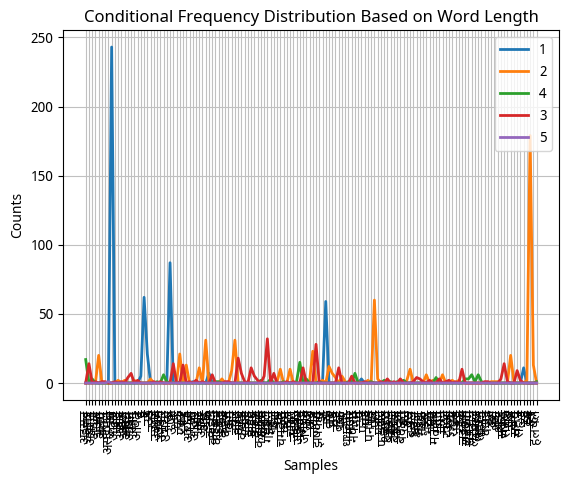

In [74]:
cfd_length.plot(title='Conditional Frequency Distribution Based on Word Length')

In [75]:
# First Character and lenghth as Condition
first_char_pairs = [(token[0], token) for token in tokens if  len(token) >= 12]
cfd_first_char = ConditionalFreqDist(first_char_pairs)
print("Conditions based on first character:", cfd_first_char.conditions())

Conditions based on first character: ['प', 'उ', 'आ', 'ब', 'ख', 'म', 'क', 'ग', 'छ']


In [76]:
cfd_first_char.tabulate()

             आत्महत्या—अपमानजनक               उतारल-कागज-हमार                  उल्टा-पुल्टा                 कर्तव्यनिष्ठा                  खिलौना-स्टोर गोल-गोल-गोल-गोल-गोल-गोल-चक्कर                  छूवेला-जीवित                 पनपेला-प्रलाप                  प्रवृत्ति-एक              प्रोत्साहन-लेकिन                 बिछौना-खिड़की                  मूर्खतापूर्ण 
आ                             1                             0                             0                             0                             0                             0                             0                             0                             0                             0                             0                             0 
उ                             0                             1                             1                             0                             0                             0                             0                             0                             0   

<Axes: title={'center': 'Conditional Frequency Distribution Based on First Character & length'}, xlabel='Samples', ylabel='Counts'>

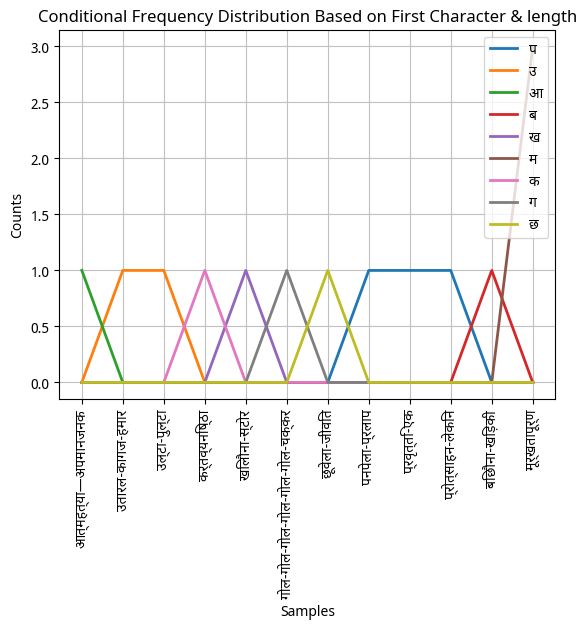

In [77]:
cfd_first_char.plot(title='Conditional Frequency Distribution Based on First Character & length')

In [78]:
# Vowel Count as Condition
vowel_count_pairs = [(sum(1 for char in token if char in 'अआइईउऊएऐओऔअंअः'), token) for token in tokens if token.isalpha()]
cfd_vowel_count = ConditionalFreqDist(vowel_count_pairs)
print("Conditions based on vowel count:", cfd_vowel_count.conditions())


Conditions based on vowel count: [0, 1, 2]


In [79]:
cfd_vowel_count.tabulate()

   अइसन   अगर  अचरज   अचल    अब   अलग   असल असहमत     आ   आइल    आई   आईल    आज   आदत   आपन    आम   आवत     इ     ई     उ    उठ   उतर  उतरल   उधम  उनकर  उभरत     ऊ   ऊपर     ए    एक   एकर    एह   ऑयल     ओ   ओकर    ओर   ओवर    ओह     क   कइल  कइलन  कइसन    कई   कईल   कदम    कम    कर   करत   करब   कवक    कह   कहत   कहब   कहल  कहलस   खतम   गइल  गइलन   गईल    गज    घर  चमकत   चरम    चल   चलत  जइबऽ  जइसन   जगह  जगहन    जज    जब   जवन  झपकत    डर     त    तक    तब    तय   तरह    थक    दर  धधकत   नजर  नफरत    नम     प   पतई    पद  पनपत    पर    पल   पलट  फइलल   बइठ  बइठल   बगल  बचपन   बदल  बदलत    बन    बस   बसल   भइल   भईल   भटक    भर   भरल    मत  मतलब   मदद    मन   मरल   रउआ    रख   रखल    रह   रहल  लइकन  लउकत  लगभग  लटकल  लमहर  लहरन   वजन   वजह    वन    वश    शक   शहर   सकत   सनक    सब    सभ   समय   सहज     ह    हई    हम    हर  हलचल 
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0

<Axes: title={'center': 'Conditions based on vowel count'}, xlabel='Samples', ylabel='Counts'>

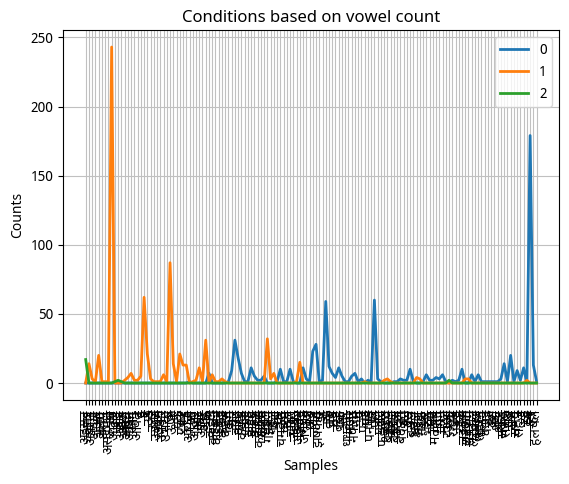

In [80]:
cfd_vowel_count.plot(title="Conditions based on vowel count")

**Stopwords**

In [81]:
!pip install stopwordsiso

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 3.0 MB/s eta 0:00:00


In [82]:
# Python
import stopwordsiso as stopwords
from collections import Counter
stopwords.has_lang("hi")

True

In [83]:
# Get Hindi stopwords using stopwordsiso
hindi_stopwords = stopwords.stopwords("hi")
print(hindi_stopwords)

{'इंहें', 'बनि', 'आप', 'एस', 'नहिं', 'दबारा', 'किंहें', 'होता', 'कोन', 'इनका', 'जिंहें', 'इसकी', 'होना', 'पूरा', 'थि', 'किसि', 'अपनी', 'कौनसा', 'इसि', 'वर्ग', 'इन्हों', 'जिन्हें', 'दुसरा', 'वहीं', 'तरह', 'पर', 'हुअ', 'सभि', 'एक', 'होते', 'पे', 'उस', 'तो', 'भि', 'अदि', 'सबसे', 'उंहिं', 'कोइ', 'उनकी', 'की', 'तिसे', 'इसके', 'और', 'था', 'किन्हों', 'गया', 'जो', 'सारा', 'किसी', 'साबुत', 'अपना', 'उन्हें', 'बाद', 'निहायत', 'व', 'इन्हें', 'उसी', 'ऱ्वासा', 'उनके', 'जिसे', 'एसे', 'अभि', 'हुआ', 'यही', 'साभ', 'बाला', 'कर', 'तिन', 'वरग', 'हि', 'जिधर', 'आदि', 'उनको', 'कि', 'होने', 'कहा', 'कई', 'बहुत', 'कोई', 'तिस', 'इसी', 'से', 'लिए', 'वग़ैरह', 'दो', 'कितना', 'फिर', 'किर', 'यहि', 'को', 'है', 'वहां', 'वे', 'रहे', 'करें', 'अपने', 'सकते', 'तक', 'हें', 'दूसरे', 'अप', 'इस', 'करता', 'तिंहें', 'तिंहों', 'निचे', 'वुह', 'ही', 'हुई', 'उंहों', 'यहां', 'जहां', 'पहले', 'के', 'उनकि', 'ये', 'न', 'वहिं', 'नीचे', 'सो', 'का', 'हुए', 'उन्हीं', 'जिंहों', 'इन्हीं', 'रखें', 'किसे', 'यह', 'करने', 'जिन', 'जा', 'जैसे', 'भी', 

In [84]:
len(hindi_stopwords)

225

In [85]:
# Filter tokens to find stopwords and non-stopwords
filtered_tokens = [word for word in tokens if word not in hindi_stopwords]
filtered_stopwords = [word for word in tokens if word in hindi_stopwords]

# Count unique stopwords and total number of stopwords
stopword_counts = Counter(filtered_stopwords)
total_stopwords = len(filtered_stopwords)

# Length of total text without stopwords
len_without_stopwords = len(filtered_tokens)

# Output results
print("Total Number of Tokens Present in Text:", len(tokens))
print("All Stopwords Present in Text:", stopword_counts)
print("Total Number of Stopwords:", total_stopwords)
print("\nLength of Total Text Without Stopwords:", len_without_stopwords)

Total Number of Tokens Present in Text: 7498
All Stopwords Present in Text: Counter({'के': 471, 'से': 159, 'कि': 158, 'में': 128, 'ना': 102, 'पर': 60, 'रहे': 40, 'हो': 39, 'कर': 31, 'नीचे': 28, 'कुछ': 27, 'जब': 23, 'एक': 21, 'भी': 20, 'लेकिन': 18, 'बहुत': 16, 'अपना': 16, 'का': 14, 'तक': 12, 'ओर': 11, 'तरह': 11, 'घर': 10, 'पूरा': 10, 'जा': 8, 'सबसे': 7, 'तब': 7, 'साथ': 6, 'जहाँ': 6, 'बाद': 5, 'भीतर': 5, 'ही': 3, 'अभी': 3, 'उनका': 3, 'कई': 3, 'अंदर': 2, 'फिर': 1, 'द्वारा': 1, 'सारा': 1})
Total Number of Stopwords: 1486

Length of Total Text Without Stopwords: 6012


**Regular Expressions**

In [86]:
unique_tokenwords = sorted(set(tokens))
print("Sorted unique words:", unique_tokenwords)

Sorted unique words: ['!', "''", '(', ')', ',', '-जा', '.', '...', ';', '?', 'अंकुर', 'अंकुरित', 'अंगूठी', 'अंगूर', 'अंग्रेजी', 'अंडर', 'अंतहीन', 'अंतिम', 'अंदर', 'अंधविश्वास', 'अइनी', 'अइसन', 'अइसने', 'अइसे', 'अउरी', 'अकेले', 'अकेले।', 'अक्सर', 'अगर', 'अचरज', 'अचल', 'अचानक', 'अजीब', 'अतना', 'अतने', 'अत्याचारी', 'अद्भुत', 'अधिकतर', 'अधिका', 'अध्ययन', 'अनन्तता', 'अनसुना', 'अनिश्चित', 'अनुचित', 'अनुमान', 'अपना', 'अपमानजनक', 'अब', 'अबकी', 'अबहियों', 'अबहीं', 'अभद्रता', 'अभिव्यक्ति', 'अभी', 'अभी-अभी।', 'अयीसन', 'अरबेस्क', 'अलग', 'अलग-अलग', 'अलग-थलग', 'अलावे', 'अवसाद-', 'अवहेलना', 'अविश्वसनीय', 'अवुरी', 'अशुद्ध', 'असंख्य', 'असमंजस', 'असल', 'असली', 'असहमत', 'अस्थायी', 'आ', 'आँख', 'आँखि', 'आंकड़ा', 'आइल', 'आई', 'आईल', 'आकर्षक', 'आकार', 'आकृति', 'आखिर', 'आखिरकार', 'आखिरी', 'आज', 'आजमा', 'आजमावे', 'आजु', 'आज्ञा', 'आडंबर', 'आडंबरपूर्ण', 'आतंक', 'आतिशबाजी', 'आत्मसंयम', 'आत्महत्या—अपमानजनक', 'आत्मा', 'आदत', 'आदमी', 'आधा', 'आपके', 'आपन', 'आम', 'आराम', 'आरामदायक', 'आर्बर', 'आलसी', 'आवत', 'आवाज', 'आव

In [87]:
import re
wordlist = unique_tokenwords

In [88]:
[w for w in wordlist if re.search('इल$', w)]

['आइल', 'कइल', 'खिसियाइल', 'गइल', 'चीराइल', 'जाइल', 'बुझाइल', 'भइल', 'लुकाइल']

In [89]:
[w for w in wordlist if re.search('^अइ', w)]

['अइनी', 'अइसन', 'अइसने', 'अइसे']

In [90]:
[w for w in wordlist if re.search('^उ..व.$', w)]

['उठावत', 'उठावे']

In [91]:
[w for w in wordlist if re.search('^[अआइ][हमग]$', w)]

['आम']

In [92]:
[w for w in wordlist if re.search('^बु+झा+इ+ल+$', w)]

['बुझाइल']

In [93]:
print([w for w in wordlist if re.search('^[अ-श्र]{4,7}$', w)])

['अचरज', 'अध्ययन', 'आर्बर', 'आश्चर्य', 'उच्च', 'उतरल', 'उनकर', 'उपक्रम', 'उभरत', 'एल्म', 'कइलन', 'कर्तव्य', 'क्रम', 'गइलन', 'गर्दन', 'गर्व', 'चमकत', 'झपकत', 'दर्द', 'धधकत', 'धन्य', 'नफरत', 'पनपत', 'फइलल', 'फर्श', 'बइठल', 'बचपन', 'बदलत', 'बल्ब', 'भ्रम', 'मतलब', 'मरम्मत', 'लइकन', 'लउकत', 'लगभग', 'लटकल', 'शब्द']


In [94]:
[w for w in wordlist if re.search('^[अ-श्र]{3,}-[अ-श्र]{2,3}$', w)]

['अलग-अलग', 'अलग-थलग', 'इधर-उधर']

In [95]:
print([w for w in wordlist if re.search('(इल|लन)$', w)])

['आइल', 'कइल', 'कइलन', 'खिसियाइल', 'गइल', 'गइलन', 'चीराइल', 'जाइल', 'देवालन', 'पालन', 'बुझाइल', 'भइल', 'लुकाइल']
